# Task 1

Za rezultate sem uporabljala:    
small graphs: g7 n=6, g1 n=4      
medium graphs: g2 n=9, g3 n=12     
large graphs: g8 n=15, g4, n=20

In [133]:
import pygad 
import pandas as pd
import matplotlib.pyplot as plt
import os

In [175]:
def read_graph(path):
    with open(path) as f: n = int(f.readline())
    print(n)
    graph = pd.read_csv(path, sep=" ", skiprows=1, names=["A", "B", "w"])
    print(graph)
    return n, graph

In [200]:
# choose graph
path = "../graphs/g3.txt"

n, graph = read_graph(path)

# choose start and end paramethers
start = 1
end = 12

12
     A   B  w
0    1   4  7
1    1   7  9
2    1   9  4
3    1  11  4
4    2   1  3
..  ..  .. ..
66  12   1  2
67  12   6  3
68  12   9  3
69  12  10  4
70  12  11  7

[71 rows x 3 columns]


In [201]:

# fitness function
def pathLength(pygad_instance, path, solution_index):
    INVALID = -1e12
    path_real = []
    seen = set()

    for x in path:
        if x != 0 and x not in seen:
            path_real.append(x)
            seen.add(x)
    path_real.append(end)

    N = len(path_real)
    dist = 0
    prev = start

    for i in range(N): 
        node = path_real[i]

        w = graph.loc[(graph['A'] == prev) & (graph['B'] == node), 'w']
        if w.empty:
            return INVALID    # punish not available path
        
        dist += w.values[0]
        prev = node

    return -dist


In [202]:
def genetic_algo_task1(number_generations, number_parents_mating, solutions_per_pop, crossover_type):
  gene_space = [i for i in range(0, n+1) if i != start and i != end]
  print(f"gene space: {gene_space}")

  ga_instance = pygad.GA(fitness_func = pathLength,
                      num_generations=number_generations,
                      num_parents_mating=number_parents_mating,
                      sol_per_pop=solutions_per_pop,
                      num_genes=(n-2),
                      gene_space=gene_space,
                      gene_type=int,
                      crossover_type=crossover_type,
                      mutation_type="swap",
                      mutation_probability=0.1
                    )

  ga_instance.run()

  #solution, solution_fitness, solution_idx = ga_instance.best_solution()

  print("best solution: ", ga_instance.best_solution())
  ga_instance.plot_fitness()

  return abs(ga_instance.best_solution()[1])

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20]
best solution:  (array([ 6,  2, 10,  4, 16, 10, 16, 17,  0,  6,  2, 10,  4, 16, 10, 16, 17,
       11]), np.float64(-1000000000000.0), np.int64(0))


c:\Users\tases\miniconda3\envs\intelsys\Lib\site-packages\pygad\visualize\plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


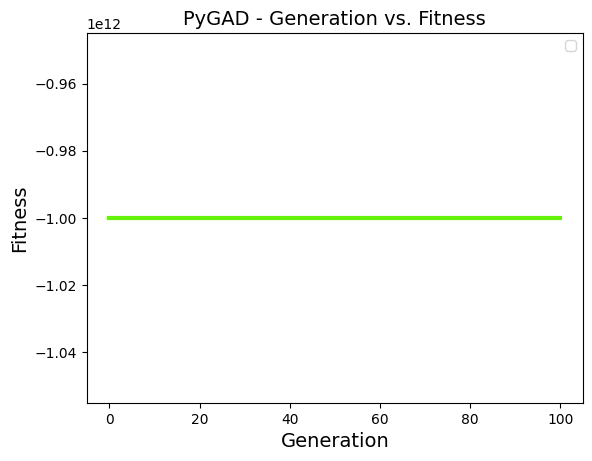

In [173]:
fitness = genetic_algo_task1(
        number_generations=100,
        number_parents_mating=5,
        solutions_per_pop=500,
        mutation_probability=0.1
    )

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
best solution:  (array([ 0, 11, 10, 10,  7,  0, 10,  7,  6,  6]), np.float64(-1000000000000.0), np.int64(0))


c:\Users\tases\miniconda3\envs\intelsys\Lib\site-packages\pygad\visualize\plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


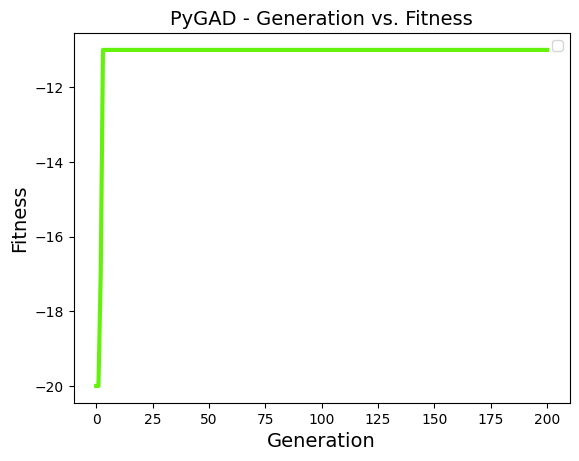

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
best solution:  (array([11,  9,  2,  2, 11,  8,  8,  2,  2, 11]), np.float64(-20.0), np.int64(0))


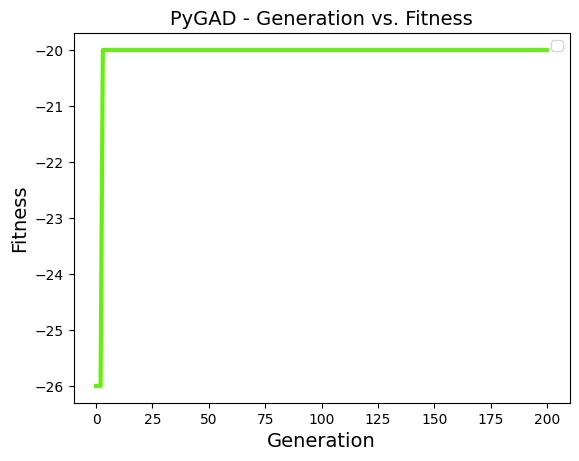

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
best solution:  (array([11, 11, 11, 10, 10, 11,  6, 11, 10, 10]), np.float64(-10.0), np.int64(0))


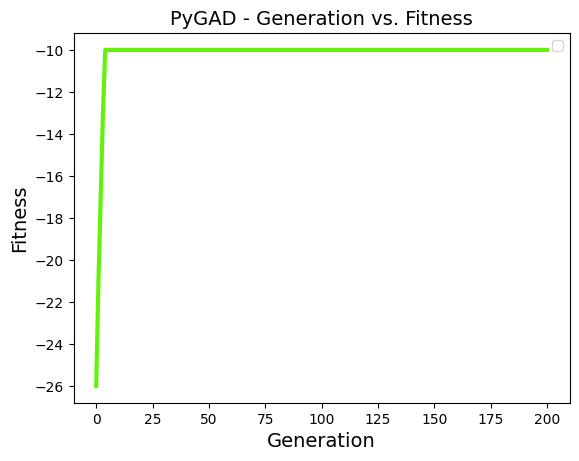

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
best solution:  (array([2, 4, 9, 4, 2, 2, 4, 9, 4, 2]), np.float64(-1000000000000.0), np.int64(0))


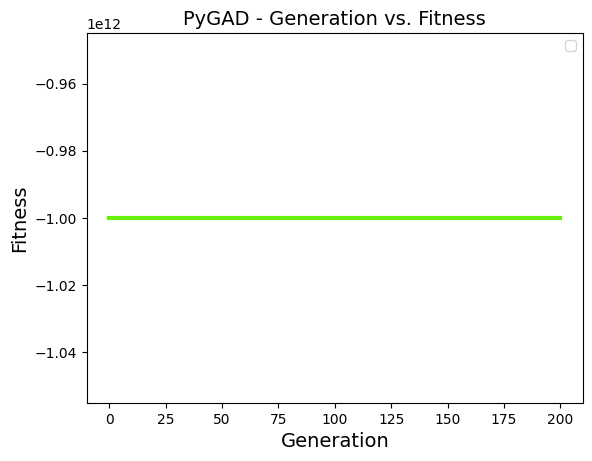

In [203]:
# shrani rezultat v .csv dolocen v path
# stolpci so stevilo generacij
# vsaka vrstica je rezultat za en graf (ce hoces kaksno odstranit jo samo zbrises)
# -> to potem narise v report -would be nice ce bi algoritem delal :)

# run with different generation sizes
cross_type = ["single_point", "two_points", "uniform", "scattered"]
csv_path = "CrossTypeResults.csv"
results = {}

for c in cross_type:
    fitness = genetic_algo_task1(
        number_generations=200,
        number_parents_mating=5,
        solutions_per_pop=100,
        crossover_type=c
    )

    results[f"cross_type_{c}"] = fitness  #a map

# change to pandas dataframe
df_row = pd.DataFrame([results])

# Save or append
if not os.path.exists(csv_path):
    df_row.to_csv(csv_path, index=False)
else:
    df_row.to_csv(csv_path, mode="a", header=False, index=False)

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20]
best solution:  (array([ 8, 17,  7, 20, 15, 19, 13,  0,  3,  8, 17,  7, 20, 15, 19, 13,  0,
        3]), np.float64(-1000000000000.0), np.int64(0))


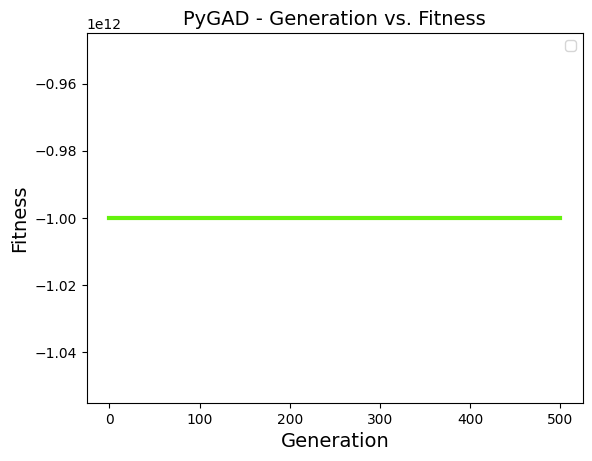

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20]
best solution:  (array([11, 19, 16, 15, 17, 18, 10, 15, 17, 11, 19, 16, 15, 17, 18, 10, 15,
       17]), np.float64(-1000000000000.0), np.int64(0))


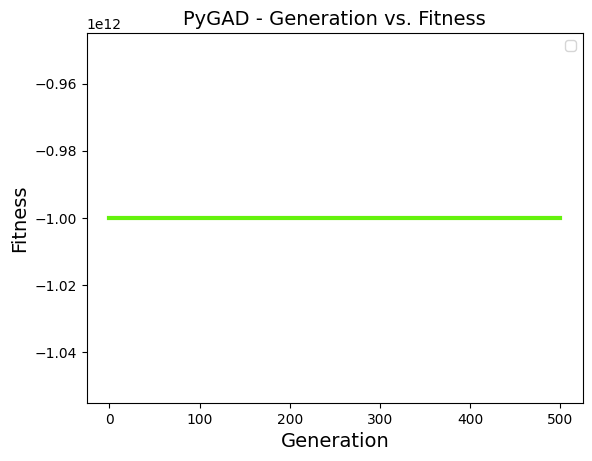

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20]
best solution:  (array([10, 16, 19, 10, 20, 11,  6, 18, 15, 10, 16, 19, 10, 20, 11,  6, 18,
       15]), np.float64(-1000000000000.0), np.int64(0))


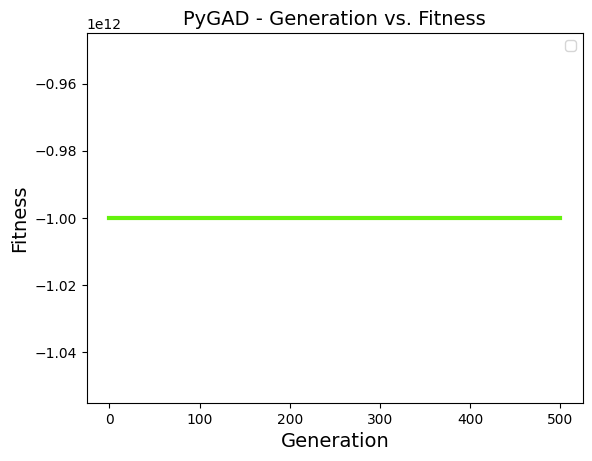

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20]
best solution:  (array([ 8, 16, 14, 20,  8,  9, 17, 14, 14,  8, 16, 14, 20,  8,  9, 17, 14,
       14]), np.float64(-1000000000000.0), np.int64(0))


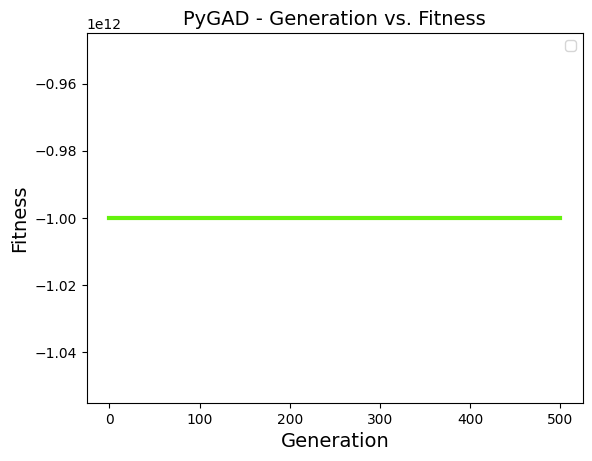

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20]
best solution:  (array([17,  9, 11,  4,  0, 18,  0,  6,  5, 17,  9, 11,  4,  0, 18,  0,  6,
        5]), np.float64(-1000000000000.0), np.int64(0))


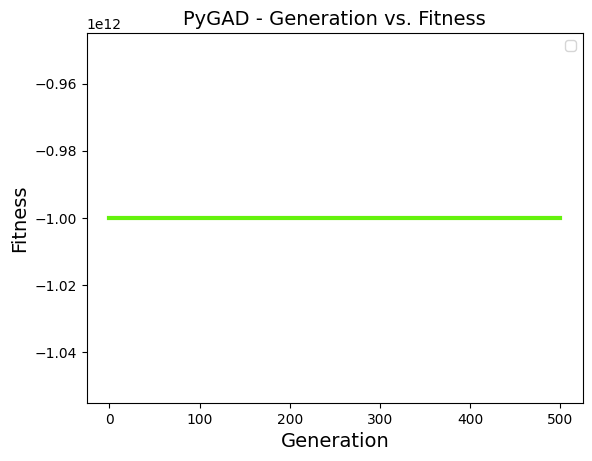

In [174]:
# shrani rezultat v .csv dolocen v path
# stolpci so stevilo generacij
# vsaka vrstica je rezultat za en graf (ce hoces kaksno odstranit jo samo zbrises)
# -> to potem narise v report -would be nice ce bi algoritem delal :)

# run with different generation sizes
mutation_probability = [0.01, 0.05, 0.1, 0.2, 0.5]
csv_path = "MutProbResults.csv"
results = {}

for m in mutation_probability:
    fitness = genetic_algo_task1(
        number_generations=500,
        number_parents_mating=5,
        solutions_per_pop=150,
        mutation_probability=m
    )

    results[f"mut_prob_{m}"] = fitness  #a map

# change to pandas dataframe
df_row = pd.DataFrame([results])

# Save or append
if not os.path.exists(csv_path):
    df_row.to_csv(csv_path, index=False)
else:
    df_row.to_csv(csv_path, mode="a", header=False, index=False)

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
best solution:  (array([16, 12,  4, 11, 16, 13,  0, 18, 16, 16, 12,  4, 11, 16, 13,  0, 18,
       16]), np.float64(-1000000000000.0), np.int64(0))


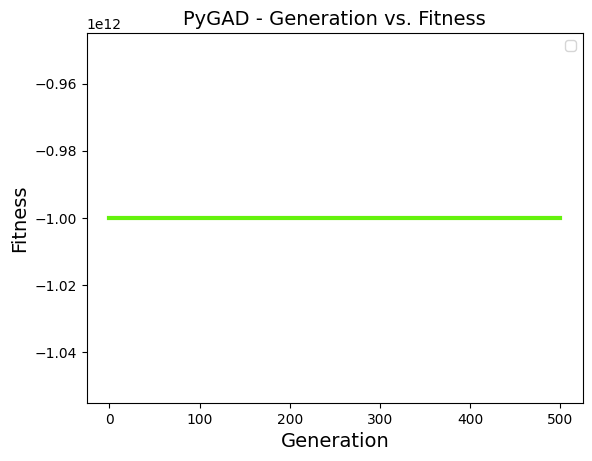

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
best solution:  (array([ 8,  3,  8,  3,  0,  2, 12,  8, 10,  8,  3,  8,  3,  0,  2, 12,  8,
       10]), np.float64(-1000000000000.0), np.int64(0))


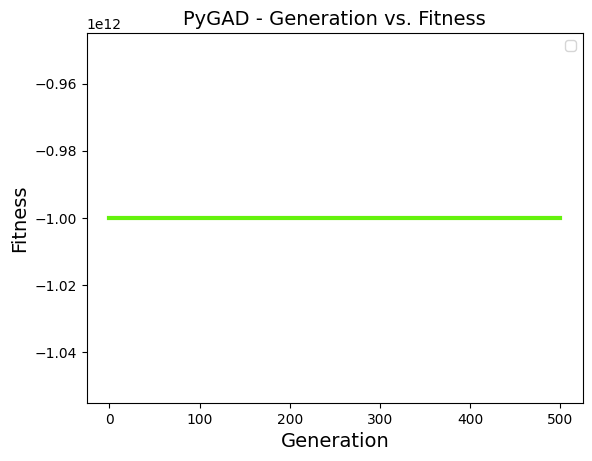

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
best solution:  (array([11, 17, 11,  9,  9,  7, 14, 18, 18, 11, 17, 11,  9,  9,  7, 14, 18,
       18]), np.float64(-1000000000000.0), np.int64(0))


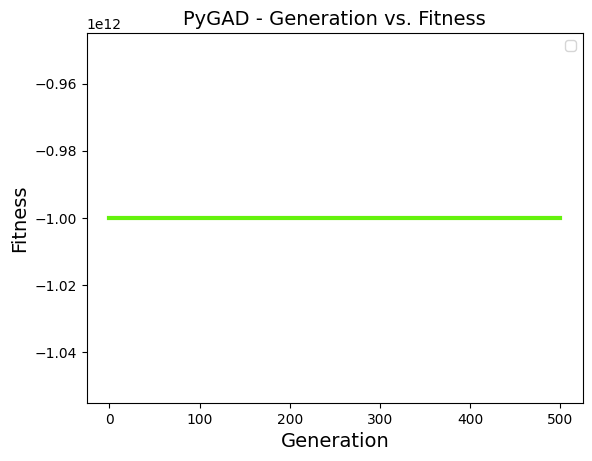

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
best solution:  (array([11, 13,  5,  9, 15, 11,  7, 16, 11, 11, 13,  5,  9, 15, 11,  7, 16,
       11]), np.float64(-1000000000000.0), np.int64(0))


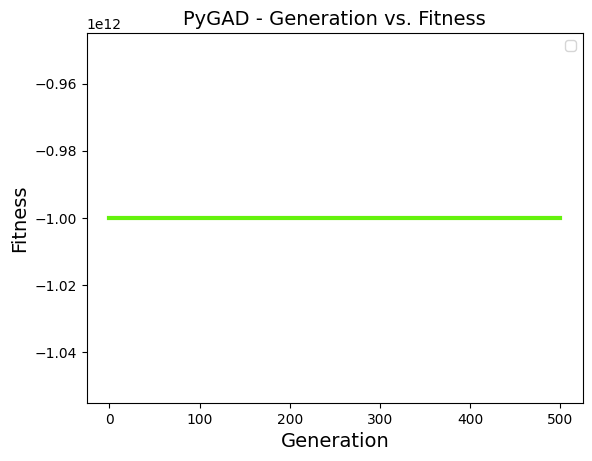

gene space: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
best solution:  (array([ 9,  6,  3, 15, 19,  3,  9,  3,  6,  9,  6,  3, 15, 19,  3,  9,  3,
        6]), np.float64(-1000000000000.0), np.int64(0))


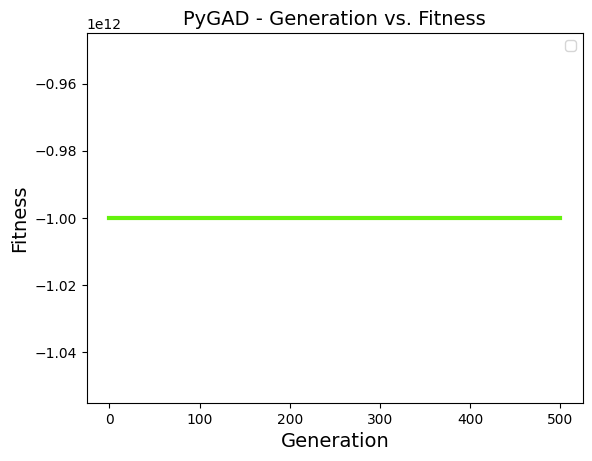

In [132]:
# shrani rezultat v .csv dolocen v path
# stolpci so stevilo generacij
# vsaka vrstica je rezultat za en graf (ce hoces kaksno odstranit jo samo zbrises)
# -> to potem narise v report -would be nice ce bi algoritem delal :)

# run with different generation sizes
initPop = [10, 25, 50, 100, 200]
csv_path = "InitPopResults.csv"
results = {}

for i in initPop:
    fitness = genetic_algo_task1(
        number_generations=500,
        number_parents_mating=5,
        solutions_per_pop=i
    )

    results[f"pop_{i}"] = fitness  #a map

# change to pandas dataframe
df_row = pd.DataFrame([results])

# Save or append
if not os.path.exists(csv_path):
    df_row.to_csv(csv_path, index=False)
else:
    df_row.to_csv(csv_path, mode="a", header=False, index=False)

gene space: [0, 2, 3, 4, 6]
best solution:  (array([4, 0, 4, 0]), np.float64(-4.0), np.int64(0))


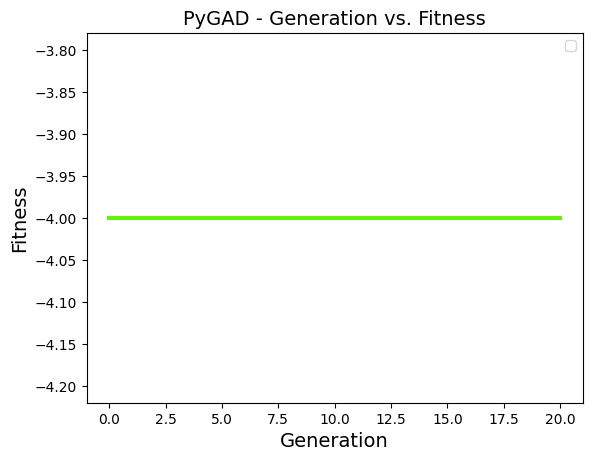

gene space: [0, 2, 3, 4, 6]
best solution:  (array([4, 0, 4, 4]), np.float64(-4.0), np.int64(0))


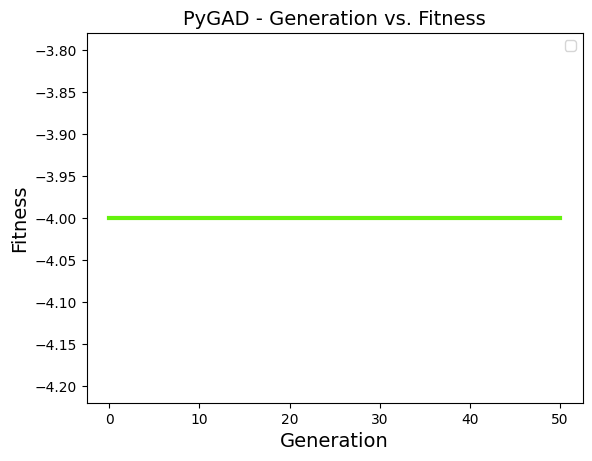

gene space: [0, 2, 3, 4, 6]
best solution:  (array([4, 4, 4, 4]), np.float64(-4.0), np.int64(0))


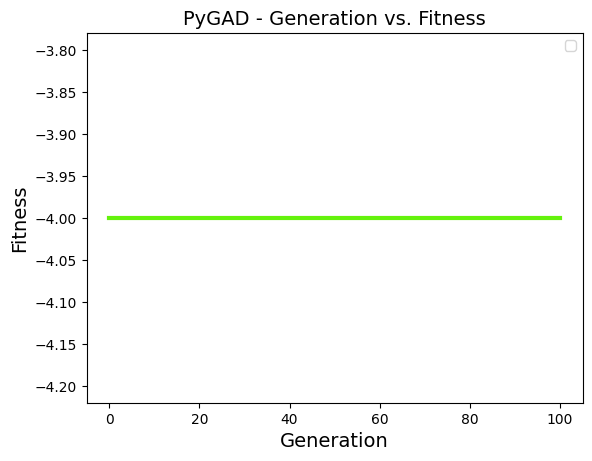

gene space: [0, 2, 3, 4, 6]
best solution:  (array([2, 2, 2, 2]), np.float64(-10.0), np.int64(0))


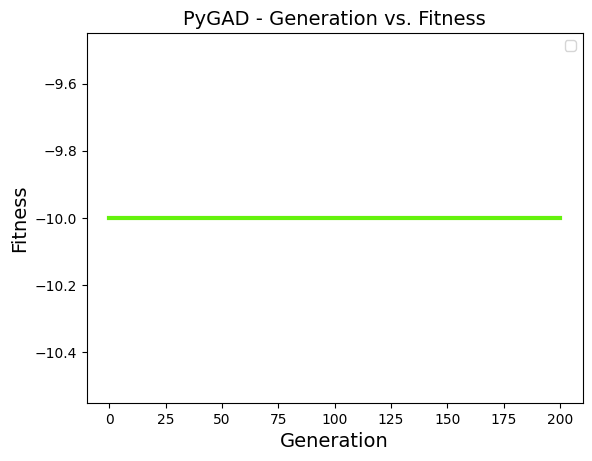

gene space: [0, 2, 3, 4, 6]
best solution:  (array([0, 4, 0, 4]), np.float64(-4.0), np.int64(0))


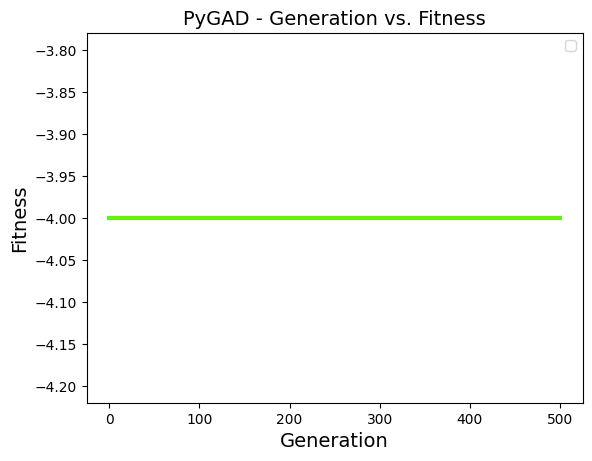

In [101]:
# shrani rezultat v .csv dolocen v path
# stolpci so stevilo generacij
# vsaka vrstica je rezultat za en graf (ce hoces kaksno odstranit jo samo zbrises)
# -> to potem narise v report -would be nice ce bi algoritem delal :)

# run with different generation sizes
generations = [20, 50, 100, 200, 500]
csv_path = "GenerationsResults.csv"
results = {}

for g in generations:
    fitness = genetic_algo_task1(
        number_generations=g,
        number_parents_mating=5,
        solutions_per_pop=50
    )

    results[f"gen_{g}"] = fitness  #a map

# change to pandas dataframe
df_row = pd.DataFrame([results])

# Save or append
if not os.path.exists(csv_path):
    df_row.to_csv(csv_path, index=False)
else:
    df_row.to_csv(csv_path, mode="a", header=False, index=False)

In [ ]:
# 1. row: n=6?
# 3. row: g1  n=4
# 4. row: g2  n=9
# 5. row: g3  n=12
# 2. row: g8  n=15
# 6. row: g4  n=20
